Question to be answered :

1. Do males or females rent bikes more often?
2. Do customers that are subcribed to the bike sharing company ride longer than non subscribed customers?
3. Do males or females ride longer on average?
4. What are the top 10 most rented bikes?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Load Divvy bike share data
divvy_q1 = pd.read_csv(r'C:\Users\cparr2\Downloads\DivvyTripDataWithGenderQ3_Cleaned.csv')
divvy_q2 = pd.read_csv(r'C:\Users\cparr2\Downloads\DivvyTripDataWithGenderQ2_Cleaned.csv')
divvy_q3 = pd.read_csv(r'C:\Users\cparr2\Downloads\DivvyTripDataWithGender_Cleaned.csv')

In [15]:
# Merge DataFrames
merged_divvy = pd.concat([divvy_q1, divvy_q2, divvy_q3], ignore_index=True)

In [16]:
# Change datatype of specific columns
merged_divvy['Start Time'] = pd.to_datetime(merged_divvy['Start Time'])
merged_divvy['End Time'] = pd.to_datetime(merged_divvy['End Time'])
merged_divvy['Birth Year'] = pd.to_numeric(merged_divvy['Birth Year'], errors='coerce')

In [20]:
print(merged_divvy.describe())

           RentalID         BikeID      Duration  Start Station ID  \
count  5.766060e+05  576606.000000  5.766060e+05     576606.000000   
mean   1.875040e+07    3537.170184  1.421870e+03        186.266971   
std    9.065174e+05    1950.949512  4.170361e+04        137.474881   
min    1.753670e+07       1.000000  6.100000e+01          2.000000   
25%    1.788472e+07    1820.000000  3.830000e+02         76.000000   
50%    1.862016e+07    3672.000000  6.500000e+02        163.000000   
75%    1.956641e+07    5310.000000  1.166000e+03        283.000000   
max    2.044905e+07    6471.000000  1.429410e+07        631.000000   

       End Station ID     Birth Year           Rows            DOW  
count   576606.000000  490724.000000  189999.000000  189999.000000  
mean       186.951057    1982.128557       2.000000       4.050242  
std        137.484187      11.024797       0.816499       1.783156  
min          2.000000    1899.000000       1.000000       1.000000  
25%         76.000000   

In [18]:
# Extract numeric part from 'Duration' and convert to seconds
merged_divvy['Duration'] = merged_divvy['Duration'].str.extract('(\d+)').astype(float)

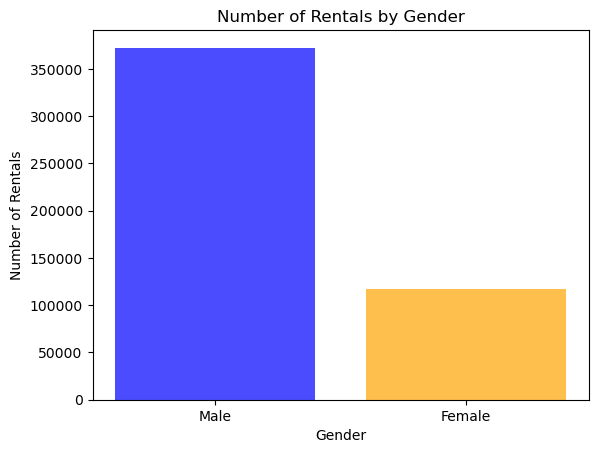

In [26]:

# Count the number of rentals by gender
gender_counts = merged_divvy['Gender'].value_counts()
# Plotting the bar chart
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Number of Rentals by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Rentals')
plt.show()

Males rent bikes significantly more than females do.

In [8]:
# Convert 'Duration' column to numeric
merged_divvy['Duration'] = pd.to_numeric(merged_divvy['Duration'], errors='coerce')

# Write and use a function
def convert_to_minutes(duration):
    return duration / 60

# Apply the function to create a new 'Duration (Minutes)' column
merged_divvy['Duration (Minutes)'] = merged_divvy['Duration'].apply(convert_to_minutes)

In [31]:
# Apply convert_to_minutes function to 'Duration' column
merged_divvy['Duration (Minutes)'] = merged_divvy['Duration'].apply(convert_to_minutes)

In [37]:

# Create a pivot table showing the average trip duration for each gender and user type
pivot_table = pd.pivot_table(merged_divvy, values='Duration (Minutes)', index=['Gender'], columns=['User Type'], aggfunc='mean')
print(pivot_table.head())

User Type   Customer  Subscriber
Gender                          
Female     50.635353   15.309389
Male       53.569452   14.159467


Subcribers rent each bike for less time than non subscribed customer.

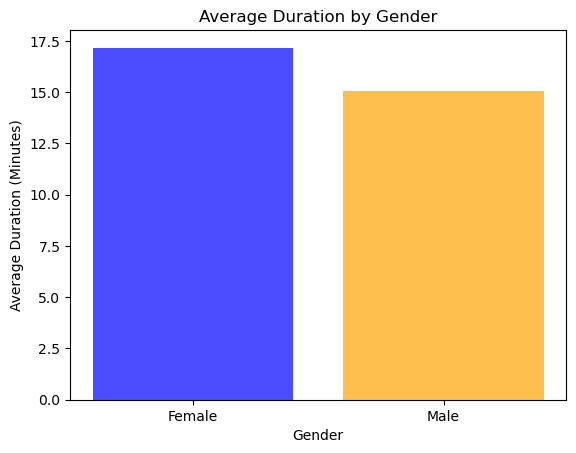

In [32]:
# Group by gender and calculate average duration
average_duration_by_gender = merged_divvy.groupby('Gender')['Duration (Minutes)'].mean()
# Plotting the bar chart
plt.bar(average_duration_by_gender.index, average_duration_by_gender.values, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Average Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Duration (Minutes)')
plt.show()

Females ride longer than males on average. This is interesting because there are significantly more men that rent bikes than women but they do not ride them as long. 

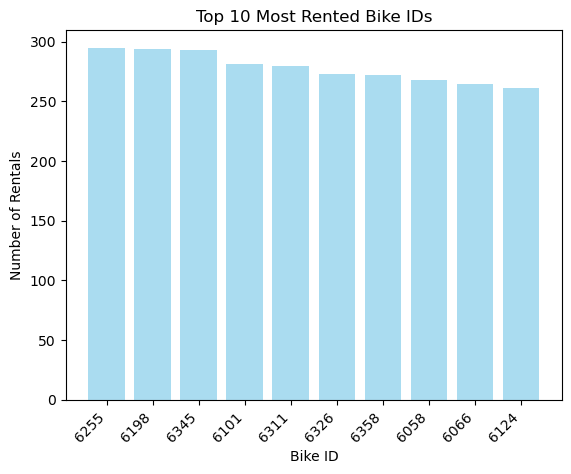

In [33]:
# Count the number of rentals for each Bike ID
bike_counts = merged_divvy['BikeID'].value_counts()

# Select the top 10 most rented Bike IDs
top_10_bikes = bike_counts.head(10)

# Plotting the bar chart
plt.bar(top_10_bikes.index.astype(str), top_10_bikes.values, color='skyblue', alpha=0.7)
plt.title('Top 10 Most Rented Bike IDs')
plt.xlabel('Bike ID')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

These are the top most rented bikes. They might be first on the priority list for maintenece or replacing. 

In [ ]:
# Change data format
merged_divvy.to_csv('MergedDivvyData.csv', index=False)